In [55]:
import pandas as pd
import numpy as np

df_160 = pd.read_csv('../dataset/velocity_dfs/data_velocity_160.csv')

def calculate_smoothed_displacement(row, window_size=10):

    data = pd.to_numeric(row[19:139], errors='coerce')
    smoothed_data = data.rolling(window=window_size, center=True).mean()

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    return max_value_smoothed - min_value_smoothed

df_160['smoothed_displacement'] = df_160.apply(calculate_smoothed_displacement, axis=1)


In [56]:
df_160.head()

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166


In [57]:
# First, ensure the necessary columns are available in the DataFrame
# Check if 'position' and 'experiment_number' columns exist
if 'position' in df_160.columns and 'experiment_number' in df_160.columns:
    # Get unique experiment numbers
    experiment_numbers = df_160['experiment_number'].unique()
    
    # Dictionary to hold DataFrames for different combinations of position and experiment number
    experiment_dataframes = {}

    # Loop through each experiment number
    for experiment in experiment_numbers:
        # Filter for Right position
        df_right = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == experiment)]
        # Filter for Left position
        df_left = df_160[(df_160['position'] == 'Left') & (df_160['experiment_number'] == experiment)]
        
        # Store the DataFrames in a dictionary with descriptive keys
        experiment_dataframes[f"experiment_{experiment}_right"] = df_right
        experiment_dataframes[f"experiment_{experiment}_left"] = df_left

    # Now experiment_dataframes will hold each dataframe for Right and Left positions of every experiment number.
    # You can now access them using experiment_dataframes['experiment_X_right'] or experiment_dataframes['experiment_X_left']
else:
    print("The required columns 'position' and 'experiment_number' are missing.")


In [58]:
experiment_dataframes["experiment_2_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,27/01/2005 06:51:04,47179.187,0,194525,1,15,1,1,160.0,4.116579,...,0.003801,0.003751,0.003741,0.003761,0.003741,NaN,2,Right,0.000185,0.000161
157,27/01/2005 06:56:04,47479.891,0,195763,1,15,1,1,160.0,4.116579,...,0.003731,0.003791,0.003751,0.003771,0.003791,NaN,2,Right,0.000190,0.000169
158,27/01/2005 07:01:05,47780.484,0,197001,1,15,1,1,160.0,4.116579,...,0.003781,0.003761,0.003731,0.003801,0.003741,NaN,2,Right,0.000195,0.000166
159,27/01/2005 07:06:05,48080.625,0,198236,1,15,1,1,160.0,4.116579,...,0.003692,0.003781,0.003761,0.003751,0.003791,NaN,2,Right,0.000185,0.000157


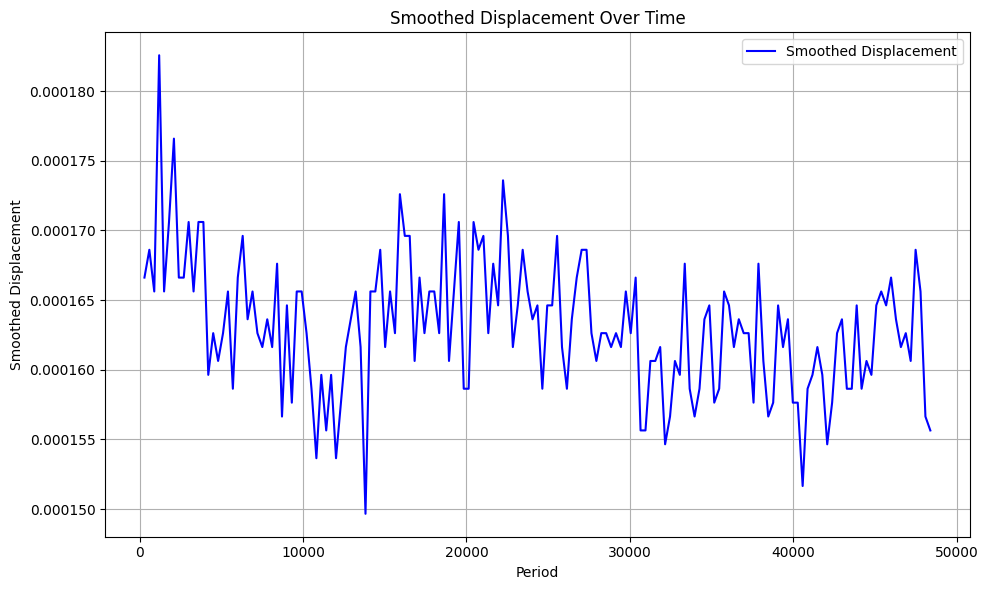

In [59]:
# Plotting smoothed displacement vs Period

import matplotlib.pyplot as plt
def plot(df):

    df_160['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    # Plot smoothed displacement over time (Period)
    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_displacement'], label='Smoothed Displacement', color='blue')
    plt.xlabel('Period')
    plt.ylabel('Smoothed Displacement')
    plt.title('Smoothed Displacement Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot(experiment_dataframes["experiment_2_right"])

In [71]:
def remove_outliers_and_smooth(df, threshold=0.000015):
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()

    # Loop through the smoothed displacement and check for large jumps
    for i in range(1, len(df_cleaned['smoothed_displacement']) - 1):
        current_value = df_cleaned['smoothed_displacement'].iloc[i]
        prev_value = df_cleaned['smoothed_displacement'].iloc[i - 1]
        next_value = df_cleaned['smoothed_displacement'].iloc[i + 1]
        
        # If the change is bigger than the threshold
        if abs(current_value - prev_value) > threshold:
            # Replace the current value with the average of previous and next values
            df_cleaned['smoothed_displacement'].iloc[i] = (prev_value + next_value) / 2

    return df_cleaned

experiment_dataframes_cleaned = remove_outliers_and_smooth(experiment_dataframes["experiment_2_right"], 0.000010)

C:\Users\alira\AppData\Local\Temp\ipykernel_6112\181629519.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cleaned['smoothed_displacement'].iloc[i] = (prev_value + next_value) / 2
C:\Users\alira\AppData\Local\Temp\ipykernel_6112\1816

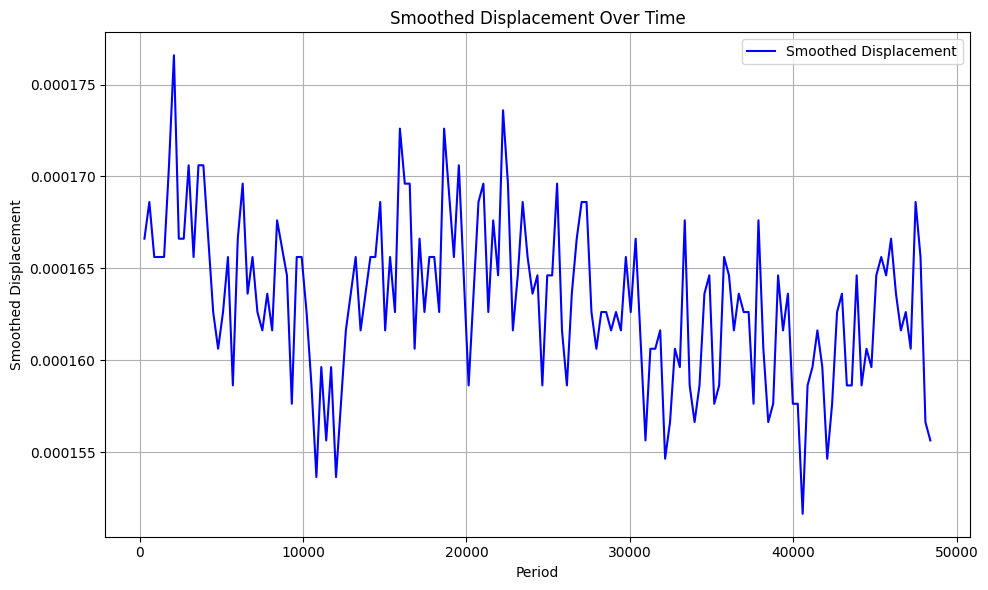

: 

In [72]:
plot(experiment_dataframes_cleaned)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = df_160[['velocity', 'Cycle_Number']]
y = df_160['displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display the MSE
mse


In [5]:
df_160

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,133,134,135,136,137,138,139,experiment_number,position,displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,22/06/2005 07:07:03,47183.672,0,194765,1,14,1,1,160.0,4.116579,...,0.004694,0.004744,0.004704,0.004694,0.004734,0.004674,NaN,7,Left,0.000180
1284,22/06/2005 07:12:03,47483.703,0,195997,1,14,1,1,160.0,4.116579,...,0.004674,0.004704,0.004724,0.004694,0.004734,0.004704,NaN,7,Left,0.000170
1285,22/06/2005 07:17:04,47784.500,0,197238,1,14,1,1,160.0,4.116579,...,0.004694,0.004714,0.004724,0.004684,0.004724,0.004724,NaN,7,Left,0.000178
1286,22/06/2005 07:22:05,48085.500,0,198477,1,14,1,1,160.0,4.116579,...,0.004714,0.004694,0.004724,0.004714,0.004674,0.004753,NaN,7,Left,0.000170


In [6]:
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],  # replace with the actual velocity value
    'Cycle_Number': [2777]  # replace with the actual cycle number value
})

# Predict the displacement
predicted_displacement = model.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


Predicted Displacement: 0.00019449037270762433
